In [52]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

# 7.1
## 7.1.1

In [2]:
from torchvision import datasets
data_path = "data/"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

## 7.1.2

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [5]:
len(cifar10)

50000

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1137B5518>, 1, 'automobile')

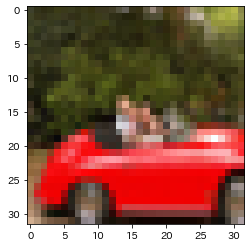

In [7]:
plt.imshow(img)
plt.show()

## 7.1.3

In [8]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [9]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [10]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [11]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [12]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

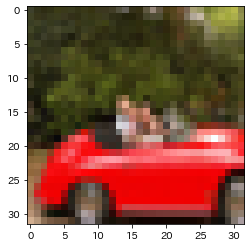

In [14]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## 7.1.4

In [15]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [16]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [17]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [18]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [19]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


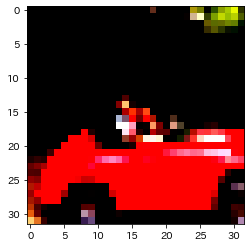

In [20]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

# 7.2
## 7.2.1

In [36]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

In [60]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

## 7.2.2

In [38]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(3072, 512,), # (入力される特徴量の数, 隠れ層のサイズ)
            nn.Tanh(),
            nn.Linear(512, n_out,)
)

## 7.2.3   
softmax使えば確率に対応できるよっていう話  

## 7.2.4

In [39]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [40]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [41]:
softmax(x).sum()

tensor(1.)

In [42]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                   [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [43]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


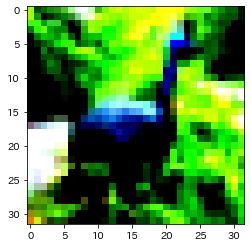

In [44]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [45]:
img_batch = img.view(-1).unsqueeze(0)

In [46]:
out = model(img_batch)
out

tensor([[0.6139, 0.3861]], grad_fn=<SoftmaxBackward0>)

In [47]:
_, index = torch.max(out, dim=1)
index

tensor([0])

## 7.2.5

In [48]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

In [49]:
loss = nn.NLLLoss()

In [50]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.7652, grad_fn=<NllLossBackward0>)

## 7.2.6

In [53]:
import torch
import torch.nn as nn
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # 最後の画像の損失を出力します
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 4.028780
Epoch: 1, Loss: 1.661085
Epoch: 2, Loss: 4.851367
Epoch: 3, Loss: 6.171830
Epoch: 4, Loss: 6.664773
Epoch: 5, Loss: 4.658957
Epoch: 6, Loss: 1.739245
Epoch: 7, Loss: 2.126773
Epoch: 8, Loss: 9.188570
Epoch: 9, Loss: 7.081150
Epoch: 10, Loss: 10.612674
Epoch: 11, Loss: 8.125198
Epoch: 12, Loss: 13.426434
Epoch: 13, Loss: 1.817014
Epoch: 14, Loss: 10.722897
Epoch: 15, Loss: 15.570053
Epoch: 16, Loss: 9.654103
Epoch: 17, Loss: 1.036546
Epoch: 18, Loss: 1.456138
Epoch: 19, Loss: 2.409344
Epoch: 20, Loss: 10.178215
Epoch: 21, Loss: 14.366916
Epoch: 22, Loss: 12.742320
Epoch: 23, Loss: 2.299199
Epoch: 24, Loss: 12.906838
Epoch: 25, Loss: 2.555940
Epoch: 26, Loss: 2.436572
Epoch: 27, Loss: 3.137813
Epoch: 28, Loss: 10.828568
Epoch: 29, Loss: 9.183104
Epoch: 30, Loss: 8.922868
Epoch: 31, Loss: 11.768345
Epoch: 32, Loss: 2.518254
Epoch: 33, Loss: 8.074298
Epoch: 34, Loss: 5.115629
Epoch: 35, Loss: 6.886944
Epoch: 36, Loss: 14.376588
Epoch: 37, Loss: 6.406636
Epoch: 38, 

In [55]:
train_loader = torch.utils.data.DataLoader(transformed_cifar2, batch_size=64, shuffle=True)

In [58]:
import torch
import torch.nn as nn
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    # ランダムに選ばれたbatchが出力される

Epoch: 0, Loss: 0.289325
Epoch: 1, Loss: 0.616946
Epoch: 2, Loss: 0.416260
Epoch: 3, Loss: 0.570723
Epoch: 4, Loss: 0.414729
Epoch: 5, Loss: 0.441087
Epoch: 6, Loss: 0.228453
Epoch: 7, Loss: 0.444412
Epoch: 8, Loss: 0.303057
Epoch: 9, Loss: 0.642466
Epoch: 10, Loss: 0.228218
Epoch: 11, Loss: 0.296492
Epoch: 12, Loss: 0.128617
Epoch: 13, Loss: 0.422989
Epoch: 14, Loss: 0.332177
Epoch: 15, Loss: 0.387746
Epoch: 16, Loss: 0.321687
Epoch: 17, Loss: 0.363412
Epoch: 18, Loss: 0.255143
Epoch: 19, Loss: 0.613433
Epoch: 20, Loss: 0.314580
Epoch: 21, Loss: 0.061724
Epoch: 22, Loss: 0.444152
Epoch: 23, Loss: 0.148222
Epoch: 24, Loss: 0.145435
Epoch: 25, Loss: 0.176688
Epoch: 26, Loss: 0.196042
Epoch: 27, Loss: 0.326219
Epoch: 28, Loss: 0.126138
Epoch: 29, Loss: 0.125358
Epoch: 30, Loss: 0.243618
Epoch: 31, Loss: 0.167759
Epoch: 32, Loss: 0.115958
Epoch: 33, Loss: 0.301602
Epoch: 34, Loss: 0.295682
Epoch: 35, Loss: 0.195041
Epoch: 36, Loss: 0.153141
Epoch: 37, Loss: 0.184164
Epoch: 38, Loss: 0.096

In [61]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f", correct / total)

Accuracy: %f 0.809


In [62]:
# model = nn.Sequential(
#             nn.Linear(3072, 1024),
#             nn.Tanh(),
#             nn.Linear(1024, 512),
#             nn.Tanh(),
#             nn.Linear(512, 128),
#             nn.Tanh(),
#             nn.Linear(128, 2),
#             nn.LogSoftmax(dim=1))

In [63]:
# model = nn.Sequential(
#             nn.Linear(3072, 1024),
#             nn.Tanh(),
#             nn.Linear(1024, 512),
#             nn.Tanh(),
#             nn.Linear(512, 128),
#             nn.Tanh(),
#             nn.Linear(128, 2))

# loss_fn = nn.CrossEntropyLoss()

In [64]:
# 計算時間の関係上、レイヤを増やす前のものだけ
numel_list = [p.numel() for p in model.parameters() if p.requires_grad]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [65]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

## 7.2.7

畳み込みをしよう！